In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial

In [34]:
sys.path.append('../common')
import collect_dem

<module 'download_dem' from '../common/download_dem.py'>

In [69]:
center = 34.741937, -116.747471
width = 15.0
ll = (center[0] - width, center[1] - width)
ur = (center[0] + width, center[1] + width)
bounds = (*ll, *ur)

In [70]:
zoom = 5
proj = 'utm11S'
LON, LAT, DEM = collect_dem.get_dem(zoom, bounds, 200)
tris = scipy.spatial.Delaunay(np.vstack((LON, LAT)).T).simplices.copy()

proj_pts = collect_dem.project(LON, LAT, DEM, proj)
proj_m = (proj_pts, tris)

5 4 10
5 5 10
5 6 10
5 4 11
5 5 11
5 6 11
5 4 12
5 5 12
5 6 12
5 4 13
5 5 13
5 6 13
5 4 14
5 5 14
5 6 14
11S


In [71]:
proj_m[0][np.isnan(proj_m[0])] = 0

<IPython.core.display.Javascript object>


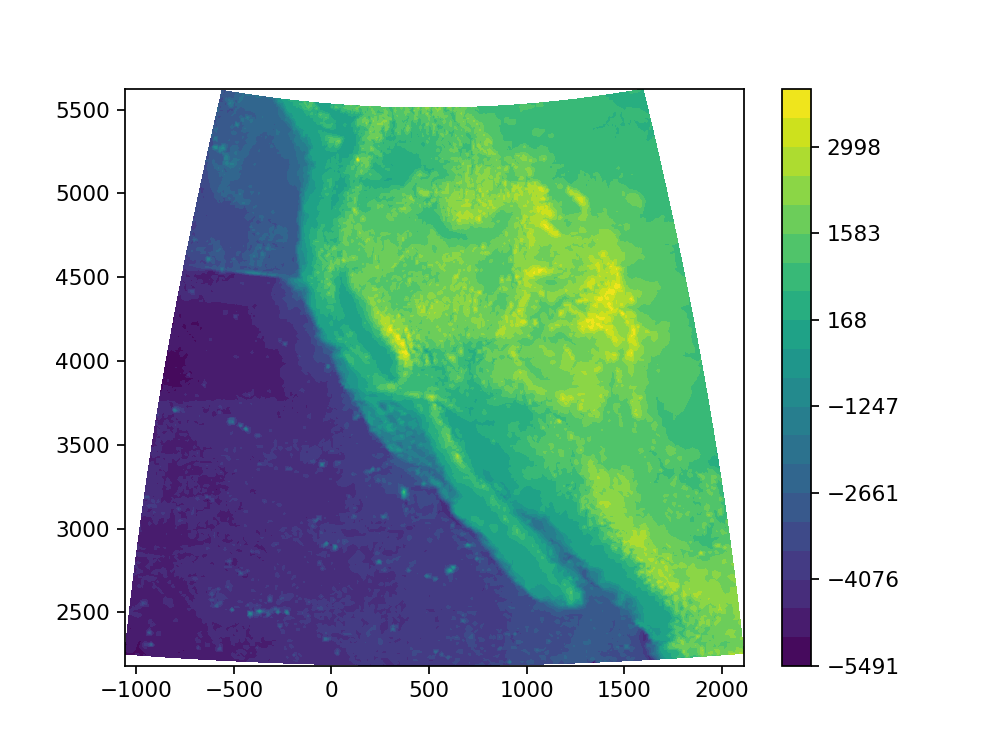

In [72]:
%matplotlib notebook
plt.figure()
min_z = np.min(proj_m[0][:,2])
max_z = np.max(proj_m[0][:,2])
levels = np.linspace(min_z, max_z, 21)
plt.tricontourf(proj_m[0][:,0] / 1000., proj_m[0][:,1] / 1000., proj_m[1], proj_m[0][:,2], levels = levels)
plt.colorbar()
plt.show()